# 4. Análise das ações realizadas pelo SFA direcionadas às famílias acolhedoras

A análise aqui proposta é de compreender quais são as ações, atividades e demais práticas ofertadas pelo SFA direcionadas às famílias acolhedoras.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [3]:
df_dados_gerais.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,coordenador_saf_situacao,capaci_equipe_tec_saf_presencial,capaci_equipe_tec_saf_ead,capaci_equipe_tec_saf_nao_faz,capaci_equipe_tec_saf_presencial_qtd,capaci_equipe_tec_saf_ead_qtd,IBGE7,nome_da_uf,Regiao,Município
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Não,Não,Não,NaN,NaN,1100114,Rondonia,Região Norte,Jaru
1,110012,"1,10012E+12",JI-PARANA,RO,02/01/2022,-10.876.486.067.028.500,-619.596.290.588.379,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,3.0,4.0,1100122,Rondonia,Região Norte,Ji-Paraná
2,110020,"1,1002E+12",PORTO VELHO,RO,13/12/2017,-915.359.258.390.788,-643.068.141.967.022,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,5.0,5.0,1100205,Rondonia,Região Norte,Porto Velho
3,120040,"1,2004E+12",RIO BRANCO,AC,17/05/2013,-9.948.852.227.687.540,-6.785.414.814.949.030,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1200401,Acre,Região Norte,Rio Branco
4,130170,"1,3017E+12",HUMAITA,AM,28/12/2020,-7.519.639.784.496.380,-63.031.353.950.500.400,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1301704,Amazonas,Região Norte,Humaitá


In [4]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'municipio',
 'uf',
 'data_implementacao_unidade',
 'Latitude',
 'Longitude',
 'natureza_unidade',
 'custo_manutencao',
 'servico_regulamentado',
 'ano_implementacao_servico',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'subsidio_outros_quais',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_te

In [5]:
# Define cores para cada região
cores_regiao = {
    'Região Norte': 'blue', 'Região Nordeste': 'green', 'Região Centro Oeste': 'orange',
    'Região Sudeste': 'red', 'Região Sul': 'purple'
}

## 4.1. Variáveis relacionadas à divulgação para captar novas famílias

Atividades promovidas para a divulgação do Serviço de Acolhimento em Famílias Acolhedoras e captação de novas famílias acolhedoras:

- 'divulgacao_outdoors_busdoors': Outdoors e busdoors
- 'divulgacao_materiais_grande_circ': Cartazes e/ou distribuição de material de divulgação em locais de grande circulação
- 'divulgacao_radio_tv_impressa': Campanhas e/ou entrevistas em rádios, TV e mídia impressa
- 'divulgacao_eventos_palestras': Realização de eventos, encontros, palestras, seminários sobre o tema
- 'divulgacao_redes_sociais': Divulgação por meio de redes sociais
- 'divulgacao_articulacao_liderancas': Articulação com lideranças comunitárias, associações, movimentos religiosos, dentre outros, para busca ativa de
famílias acolhedoras
- 'divulgacao_outros': Outros
- 'divulgacao_nao_faz': Não realiza nenhuma das atividades acima
- 'divulgacao_outros_quais': Quais outras atividades promovidas para a divulgação

In [6]:
colunas_divulgacao = ['divulgacao_outdoors_busdoors',
 'divulgacao_materiais_grande_circ',
 'divulgacao_radio_tv_impressa',
 'divulgacao_eventos_palestras',
 'divulgacao_redes_sociais',
 'divulgacao_articulacao_liderancas',
 'divulgacao_outros']

In [7]:
df_dados_gerais[colunas_divulgacao].isna().sum()

divulgacao_outdoors_busdoors         44
divulgacao_materiais_grande_circ     44
divulgacao_radio_tv_impressa         44
divulgacao_eventos_palestras         44
divulgacao_redes_sociais             44
divulgacao_articulacao_liderancas    44
divulgacao_outros                    44
dtype: int64

In [8]:
# Como há valores nulos nas variáveis e, como não há informação se é Não, a melhor forma é filtrar as colunas para contar apenas Sim e Não, ignorando os NaNs
freq_df_divulgacao = df_dados_gerais[colunas_divulgacao].apply(lambda x: x.value_counts(dropna=True)).T

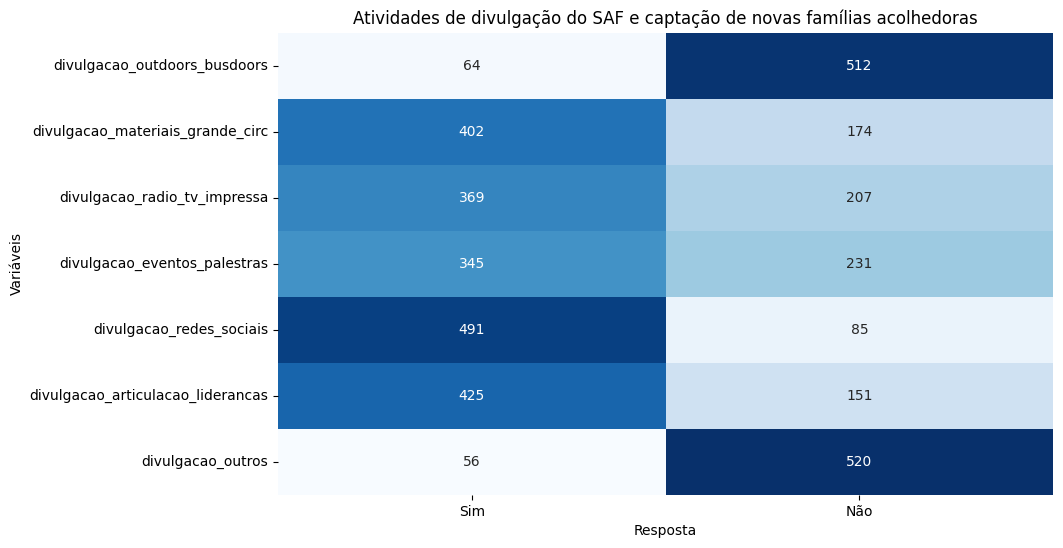

In [9]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(freq_df_divulgacao[['Sim', 'Não']], annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Atividades de divulgação do SAF e captação de novas famílias acolhedoras')
plt.xlabel('Resposta')
plt.ylabel('Variáveis')
plt.show()

In [10]:
df_dados_gerais['divulgacao_nao_faz'].value_counts()

Não    576
Name: divulgacao_nao_faz, dtype: int64

In [11]:
df_dados_gerais['divulgacao_outros_quais'].value_counts()

busca ativa                                                                           3
Mobilização e projetos em escolas com professores e alunos                            2
Reunião no municipio de ananas                                                        1
Parceria com Secretarias de Assistência Social                                        1
eventos públicos e particulares                                                       1
Praças Públicas                                                                       1
Divulgação por som de rua, e rádio                                                    1
Mobilizacao e projetos em escolas com professores e alunos                            1
edital                                                                                1
Lançamento de edital                                                                  1
ATRAVÉS DAS AGENTES DE SAÚDE                                                          1
Articulação com agentes comunitá

## 4.2. Variáveis relacionadas à seleção das famílias

Atividades promovidas sistematicamente pelo serviço para a seleção de famílias:
- 'selecao_fam_reunioes': Reunião informativa ou Palestra de Apresentação do Serviço
- 'selecao_fam_analise_doc': Análise documental
- 'selecao_fam_entrevistas': Entrevistas
- 'selecao_fam_visitas_domiciliares': Visitas domiciliares
- 'selecao_fam_outros': Outras atividades de seleção
- 'selecao_fam_nao_faz': Não realiza nenhuma atividade de formação inicial e continuada
- 'selecao_fam_outros_quais': Quais outras atividades de seleção

In [12]:
colunas_selecao = ['selecao_fam_reunioes',
 'selecao_fam_analise_doc',
 'selecao_fam_entrevistas',
 'selecao_fam_visitas_domiciliares',
 'selecao_fam_outros',
 'selecao_fam_nao_faz']

In [13]:
df_dados_gerais[colunas_selecao].isna().sum()

selecao_fam_reunioes                31
selecao_fam_analise_doc             31
selecao_fam_entrevistas             31
selecao_fam_visitas_domiciliares    31
selecao_fam_outros                  31
selecao_fam_nao_faz                  0
dtype: int64

In [14]:
# Como há valores nulos nas variáveis e, como não há informação se é Não, a melhor forma é filtrar as colunas para contar apenas Sim e Não, ignorando os NaNs
freq_df_selecao = df_dados_gerais[colunas_selecao].apply(lambda x: x.value_counts(dropna=True)).T

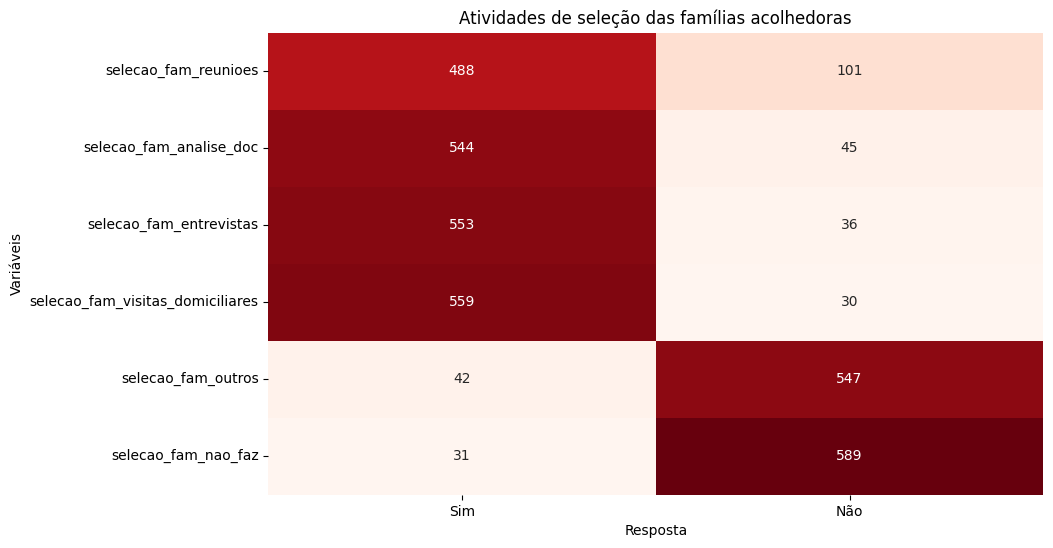

In [15]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(freq_df_selecao[['Sim', 'Não']], annot=True, cmap='Reds', cbar=False, fmt='d')
plt.title('Atividades de seleção das famílias acolhedoras')
plt.xlabel('Resposta')
plt.ylabel('Variáveis')
plt.show()

In [16]:
df_dados_gerais['selecao_fam_outros_quais'].value_counts()

encontro, formação, atendimento individual e  familiar    1
contatos telefônicos                                      1
As famílias são transferidas dos outros serviços,         1
Testagem Psicológica, palestras (ECA, Rede de Proteção    1
Avalição Psicossocial                                     1
grupos de WhatsApp                                        1
teste  pscicológico                                       1
Reunião com equipe técnica da SMAS                        1
encontros grupais com famílias                            1
Aplicação de testes psicológicos e contato com a rede     1
Edital de chamamento                                      1
anamnese social e psicologica                             1
Avaliação Psicológica                                     1
Capacitação                                               1
Capacitação continuada mensalmente                        1
capacitação, acompanhamento técnico da família            1
Apresentação de programa e orientação   

## 4.3. Variáveis relacionadas à capacitação das famílias

Em relação à capacitação inicial das famílias acolhedoras temos a variável 'ch_capacitacao_inicial' que indica a carga horária da capacitação.

Em relação a atividades sistemáticas de formação inicial e continuada das famílias acolhedoras promovidas pelo serviço:
- 'capac_ini_conti_fam_encontros_grupos': Encontros de capacitação inicial, em grupo
- 'capac_ini_conti_fam_encontros_indivi': Encontros de capacitação inicial com cada família candidata
- 'capac_ini_conti_fam_paletras': Palestras temáticas
- 'capac_ini_conti_fam_rodas_conversa': Rodas de Conversa/ Reuniões em grupo periódicas com as famílias acolhedoras
- 'capac_ini_conti_fam_outros': Outras atividades de capacitação
- 'capac_ini_conti_fam_nao_faz': Não realiza nenhuma atividade de formação inicial e continuada
- 'capac_ini_conti_fam_outros_quais': Quais outras atividades de capacitação

In [17]:
# Calcula a média de carga horária de capacitação inicial por UF
media_ch_por_uf = df_dados_gerais.groupby(['uf', 'Regiao'])['ch_capacitacao_inicial'].mean().reset_index()

In [18]:
media_ch_por_uf.sort_values(by='ch_capacitacao_inicial', ascending=False)

,uf,Regiao,ch_capacitacao_inicial
15,PI,Região Nordeste,23.000000
13,PB,Região Nordeste,19.500000
5,DF,Região Centro Oeste,18.000000
11,MT,Região Centro Oeste,17.166667
4,CE,Região Nordeste,16.500000
14,PE,Região Nordeste,16.000000
17,RJ,Região Sudeste,15.724138
3,BA,Região Nordeste,15.166667
7,GO,Região Centro Oeste,15.000000
18,RN,Região Nordeste,13.454545


In [19]:
df_dados_gerais[df_dados_gerais['uf'] == 'PI']['ch_capacitacao_inicial'].describe()

count     2.000000
mean     23.000000
std      24.041631
min       6.000000
25%      14.500000
50%      23.000000
75%      31.500000
max      40.000000
Name: ch_capacitacao_inicial, dtype: float64

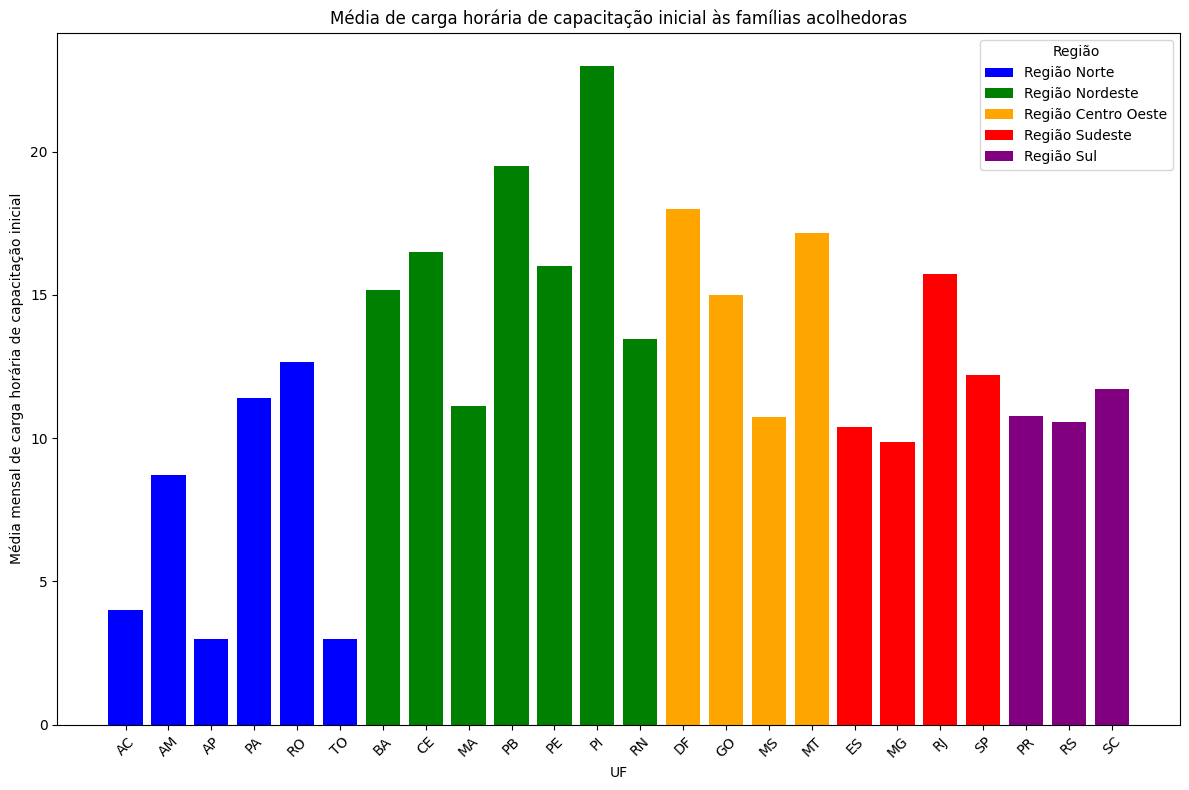

In [20]:
# Cria o gráfico de barras para média de carga horária de capacitação inicial
plt.figure(figsize=(12, 8))
for regiao, cor in cores_regiao.items():
    subset = media_ch_por_uf[media_ch_por_uf['Regiao'] == regiao]
    plt.bar(subset['uf'], subset['ch_capacitacao_inicial'], label=regiao, color=cor)

# Configurações do gráfico
plt.title('Média de carga horária de capacitação inicial às famílias acolhedoras')
plt.xlabel('UF')
plt.ylabel('Média mensal de carga horária de capacitação inicial')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

In [21]:
colunas_capacitacao = ['capac_ini_conti_fam_encontros_grupos',
 'capac_ini_conti_fam_encontros_indivi',
 'capac_ini_conti_fam_paletras',
 'capac_ini_conti_fam_rodas_conversa',
 'capac_ini_conti_fam_outros',
 'capac_ini_conti_fam_nao_faz']

In [22]:
df_dados_gerais[colunas_capacitacao].isna().sum()

capac_ini_conti_fam_encontros_grupos    58
capac_ini_conti_fam_encontros_indivi    58
capac_ini_conti_fam_paletras            58
capac_ini_conti_fam_rodas_conversa      58
capac_ini_conti_fam_outros              58
capac_ini_conti_fam_nao_faz              0
dtype: int64

In [23]:
# Como há valores nulos nas variáveis e, como não há informação se é Não, a melhor forma é filtrar as colunas para contar apenas Sim e Não, ignorando os NaNs
freq_df_capacitacao = df_dados_gerais[colunas_capacitacao].apply(lambda x: x.value_counts(dropna=True)).T

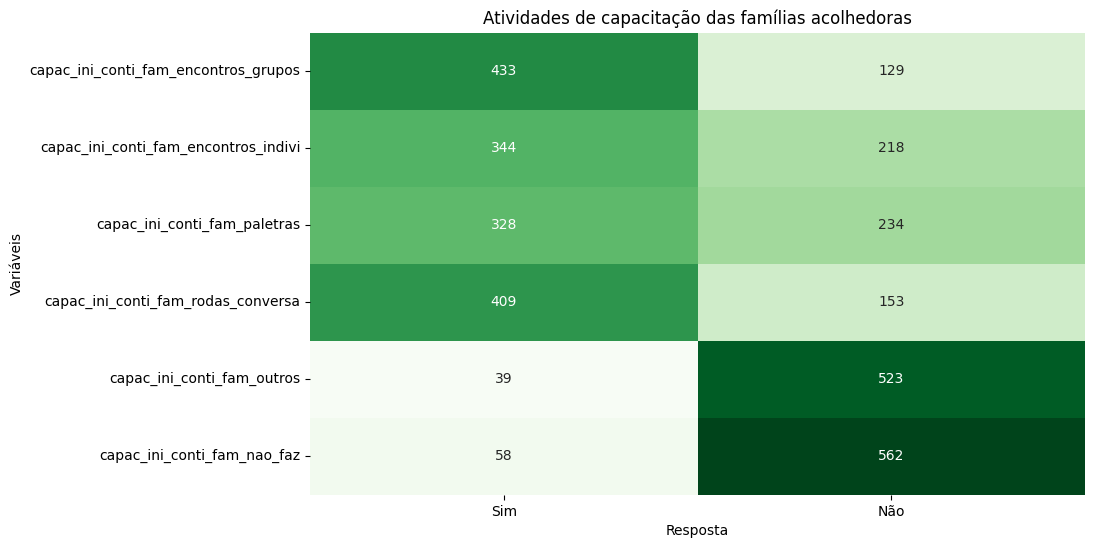

In [24]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(freq_df_capacitacao[['Sim', 'Não']], annot=True, cmap='Greens', cbar=False, fmt='d')
plt.title('Atividades de capacitação das famílias acolhedoras')
plt.xlabel('Resposta')
plt.ylabel('Variáveis')
plt.show()

In [25]:
df_dados_gerais['capac_ini_conti_fam_outros_quais'].value_counts()

visitas domiciliares                                                                                                                                         2
Organização para formação das Famílias Acolhedoras                                                                                                           1
Visitas Domiciliares e Contatos Telefônicos                                                                                                                  1
Video Encontro com as familias para orientações diversas                                                                                                     1
não tem família cadastrada                                                                                                                                   1
Reunião com equipe técnica da SMAS                                                                                                                           1
eventos festivos (homenagens, picnic, festas) 

## 4.4. Variáveis relacionadas ao acompanhamento das famílias

A variável 'freq_acompanh_fam_acolhedora' refere-se à frequência, em média, de acompanhamento de cada família acolhedora com criança/adolescente acolhida.

Atividades promovidas sistematicamente pelo serviço para acompanhamento das famílias:
- 'acompanhamento_fam_aprox_supervi': Aproximação supervisionada entre a criança/adolescente e família acolhedora
- 'acompanhamento_fam_visitas_domicil': Visitas domiciliares periódicas às famílias acolhedoras
- 'acompanhamento_fam_aten_psicoss': Atendimento psicossocial individualizado da família acolhedora
- 'acompanhamento_fam_contato_tel': Contato por whatsapp / telefone
- 'acompanhamento_fam_outros': Outras atividades de acompanhamento
- 'acompanhamento_fam_outros_quais': Quais outras atividades de acompanhamento

In [27]:
grouped_acompanhamento = (
    df_dados_gerais.groupby(['uf', 'freq_acompanh_fam_acolhedora'])
    .size()
    .reset_index(name='count')
)

In [28]:
# Garantir que todas as categorias de acompanhamento aparecem
categorias_acompanhamento = df_dados_gerais['freq_acompanh_fam_acolhedora'].unique()
grouped_pivot = (
    grouped_acompanhamento.pivot(index='uf', columns='freq_acompanh_fam_acolhedora', values='count')
    .reindex(columns=categorias_acompanhamento, fill_value=0)
)

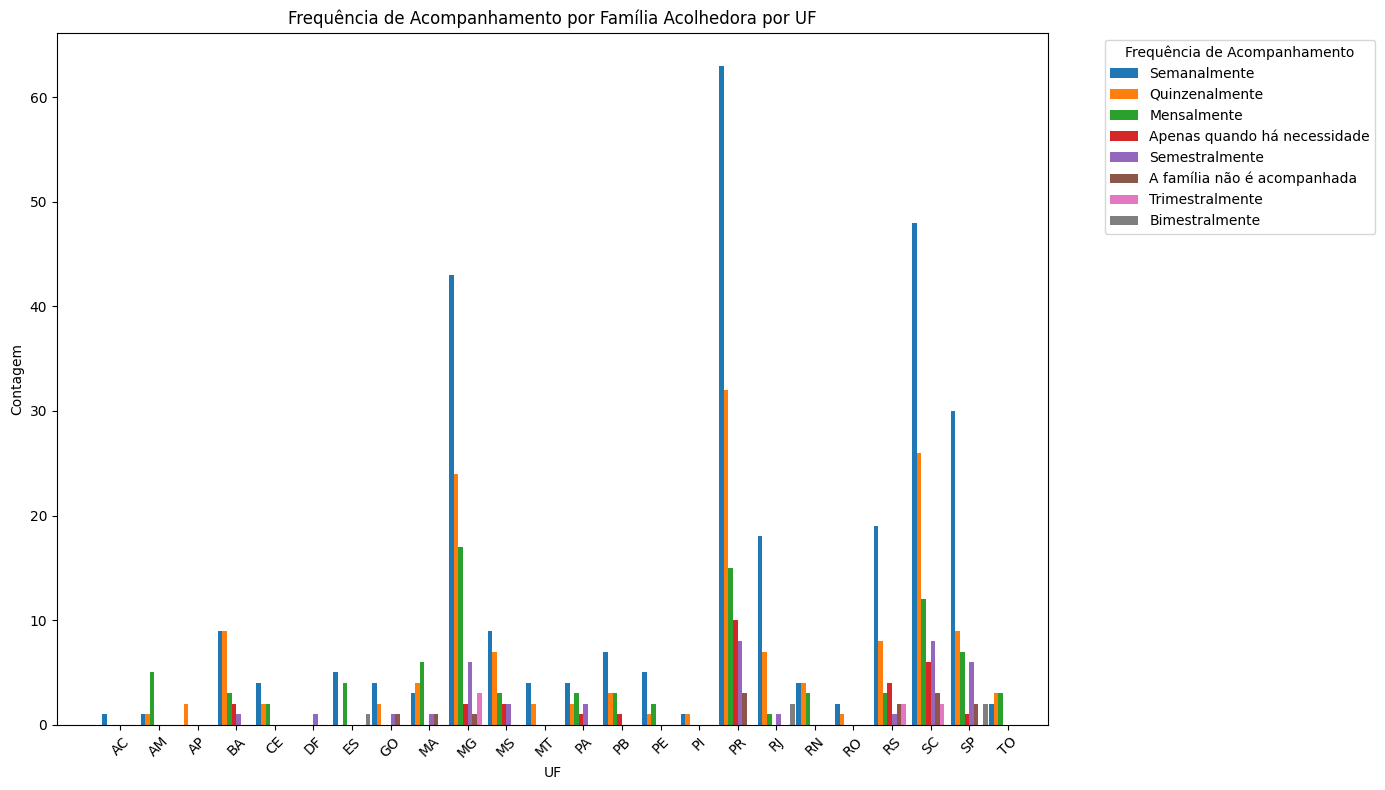

In [29]:
# Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(grouped_pivot.index))  # Número de UFs
width = 0.12  # Largura de cada barra

# Criando as barras para cada categoria
for i, categoria in enumerate(grouped_pivot.columns):
    ax.bar(
        x + i * width,
        grouped_pivot[categoria],
        width,
        label=categoria
    )

# Ajustando rótulos e legenda
ax.set_title('Frequência de Acompanhamento por Família Acolhedora por UF')
ax.set_ylabel('Contagem')
ax.set_xlabel('UF')
ax.set_xticks(x + (len(categorias_acompanhamento) - 1) * width / 2)
ax.set_xticklabels(grouped_pivot.index, rotation=45)
ax.legend(title='Frequência de Acompanhamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [30]:
colunas_acompanhamento = ['acompanhamento_fam_aprox_supervi',
 'acompanhamento_fam_visitas_domicil',
 'acompanhamento_fam_aten_psicoss',
 'acompanhamento_fam_contato_tel',
 'acompanhamento_fam_outros']

In [31]:
df_dados_gerais[colunas_acompanhamento].isna().sum()

acompanhamento_fam_aprox_supervi      47
acompanhamento_fam_visitas_domicil    47
acompanhamento_fam_aten_psicoss       47
acompanhamento_fam_contato_tel        47
acompanhamento_fam_outros             47
dtype: int64

In [32]:
# Como há valores nulos nas variáveis e, como não há informação se é Não, a melhor forma é filtrar as colunas para contar apenas Sim e Não, ignorando os NaNs
freq_df_acompanhamento = df_dados_gerais[colunas_acompanhamento].apply(lambda x: x.value_counts(dropna=True)).T

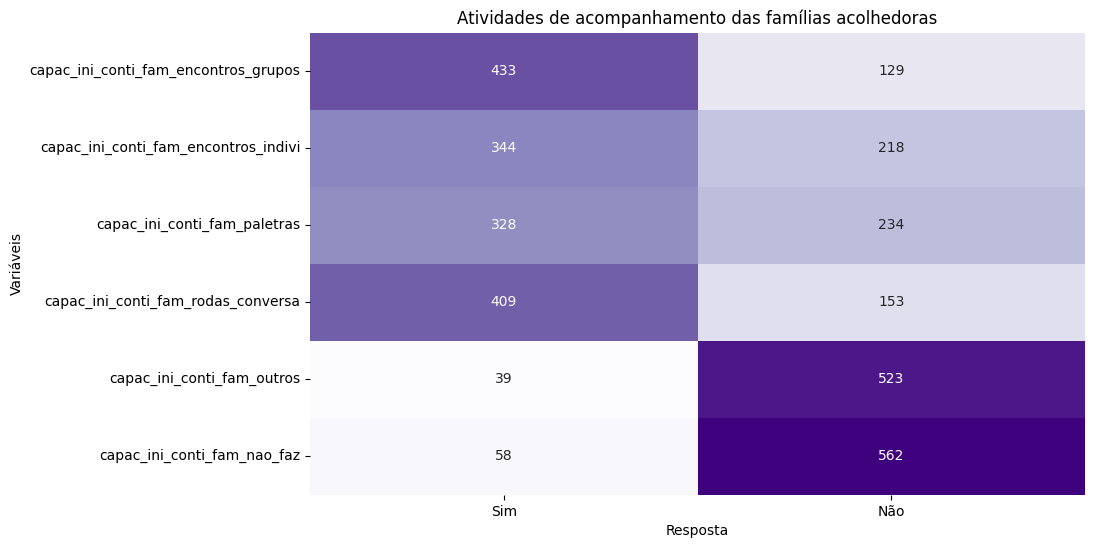

In [33]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(freq_df_capacitacao[['Sim', 'Não']], annot=True, cmap='Purples', cbar=False, fmt='d')
plt.title('Atividades de acompanhamento das famílias acolhedoras')
plt.xlabel('Resposta')
plt.ylabel('Variáveis')
plt.show()

In [34]:
df_dados_gerais['acompanhamento_fam_outros_quais'].value_counts()

MONITORAMENTO SEMANAL                                                           1
ainda estamos no momento de captação de famílias,                               1
Grupo de Família,                                                               1
não tem família cadastrada                                                      1
Ainda não há famílias habilitadas                                               1
Reunião com equipe técnica da SMAS                                              1
encontros com outras famílias                                                   1
Aproximação supervisionada entre acolhimento e familia de origem substituta     1
plantão 24 horas para atendimento das famílias                                  1
Reuniões coletivas                                                              1
está em fase de seleção ainda                                                   1
Ainda não houve acolhimento                                                     1
Reuniões com red